In [1]:
###Pysam needs to be run with anaconda. This notebook works on Ryan's Ubuntu
###using jupyter anaconda

In [2]:
%cd "/home/ipseg/Desktop/pink_to_chinook/NewLGalignment"

/home/ipseg/Desktop/pink_to_chinook/NewLGalignment


In [3]:
import pysam

In [4]:
#import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [5]:
raw_sam_file = '/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook.SAM'
filtered_sam_file = '/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_filtered.SAM.txt'

In [6]:
def get_aligns(sam_file = raw_sam_file):
    return(pysam.AlignmentFile(sam_file, "r").fetch())

###Mapping quality


In [7]:
mpqs = [read.mapping_quality for read in get_aligns()]

In [8]:
len(mpqs)

11851

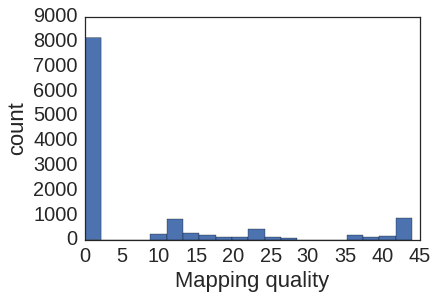

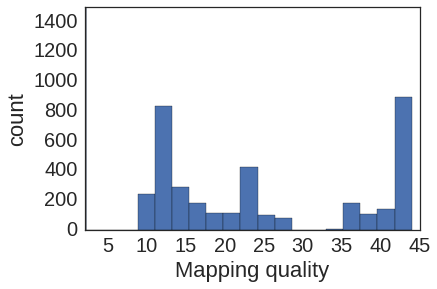

In [9]:
plt.hist(mpqs, bins = 20)
plt.xlabel('Mapping quality')
plt.ylabel('count')
plt.title('')
plt.show()

plt.hist(mpqs, bins = 20)
plt.xlabel('Mapping quality')
plt.ylabel('count')
plt.title('')
plt.xlim(2)
plt.ylim(0, 1500)
plt.show()

###Strand Bias

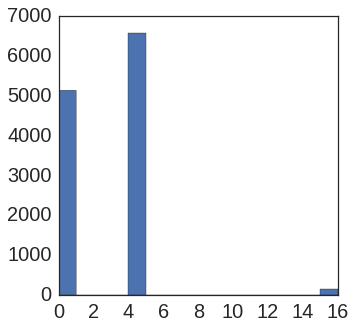

In [10]:
flags  = [read.flag for read in get_aligns()]
figsize(5,5)
plt.hist(flags, bins = 16)
plt.show()

###Alignment length

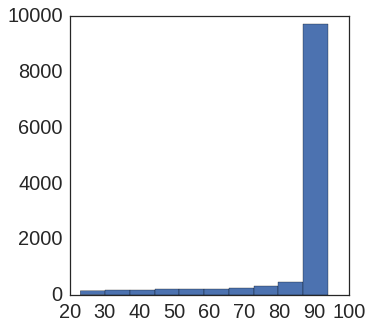

In [11]:
qal =  [read.query_alignment_length for read in get_aligns()]
plt.hist(qal)
plt.show()

In [16]:
#qal

###Edit Distances

In [13]:
edit_distances = list()
mq = list()
for read in get_aligns():
    try:
        edit_distances.append(np.int(read.get_tag('XM')))
        mq.append(np.int(read.mapping_quality))
    except KeyError:
        pass

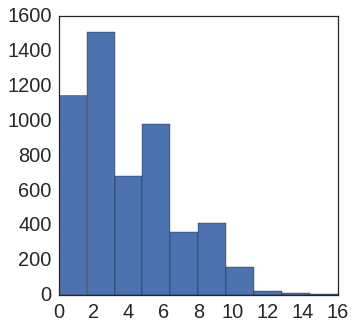

In [14]:
plt.hist(edit_distances)
plt.show()

##Edit Distance vs. Mapping Quality

In [15]:
rr = pd.DataFrame({'ed' : edit_distances, 'mq' : mq })

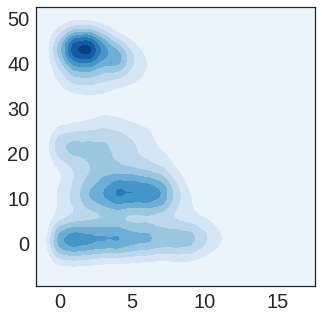

In [16]:
sns.kdeplot(rr, cmap="Blues", shade = True, legend = True)
plt.show()

##lets only keep the aligments with: (query_alignment_length>=93) AND (mapping_quality>=30)

In [17]:
with pysam.AlignmentFile(raw_sam_file, "r") as INFILE:
    with pysam.AlignmentFile(filtered_sam_file, "wh", template=INFILE) as OUTFILE:
        for aln in INFILE:
            if (aln.query_alignment_length >= 94) and (aln.mapping_quality >= 30):
                OUTFILE.write(aln)

In [18]:
filtered_SAM = pd.read_csv(filtered_sam_file, sep = '\t', comment='@', engine='python', 
            names = ['QNAME','FLAG','RNAME','POS','MAPQ','CIGAR','RNEXT','PNEXT','ISIZE','SEQ','QUAL',
                     'TAG1', 'TAG2', 'TAG3' 'TAG4', 'TAG5', 'TAG6', 'TAG7','TAG8', 'TAG9','TAG10'])
filtered_SAM.head()

,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,ISIZE,SEQ,QUAL,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,TAG7,TAG8,TAG9,TAG10
0,26987,0,34316,1,42,94M,*,0,0,TGCAGGTTCTAAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None
1,4655,0,4325,1,38,94M,*,0,0,TGCAGGTGCATACACTACGGTCGTCCTGGATACGAGTGTCTGCTAA...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU
2,67598,0,21204,1,41,94M,*,0,0,TGCAGGCAGACGATGGGCAACATTTCTGTAAAGGACCATGTGACAC...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None
3,7325,0,94449,1,44,94M,*,0,0,TGCAGGAGTGCTCATCTGGAATCCCCCTGTCCCAGTCTCCTCTATC...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None
4,84096,0,79986,1,44,94M,*,0,0,TGCAGGCAGAATCTCAGCCTCACCCCCCTGGGTGTGCCAGTTTGAT...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None


In [19]:
filtered_SAM.drop(['POS', 'RNEXT', 'PNEXT', 'ISIZE', 'SEQ','QUAL'], axis=1, inplace=True)
filtered_SAM['RNAME'] = [str(xx) for xx in filtered_SAM['RNAME'] ]
filtered_SAM.head()

,QNAME,FLAG,RNAME,MAPQ,CIGAR,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,TAG7,TAG8,TAG9,TAG10
0,26987,0,34316,42,94M,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,NM:i:4,MD:Z:10G38G29G5G8,YT:Z:UU,None
1,4655,0,4325,38,94M,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,XG:i:0,NM:i:5,MD:Z:8A8T6T30C17T20,YT:Z:UU
2,67598,0,21204,41,94M,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,NM:i:6,MD:Z:10A0C23T6T37G8G4,YT:Z:UU,None
3,7325,0,94449,44,94M,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,NM:i:3,MD:Z:14G21G35A21,YT:Z:UU,None
4,84096,0,79986,44,94M,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:25T64C3,YT:Z:UU,None


##Now Merge with pink and chinook linkage maps

In [21]:
pink_map_file = '/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_map_arm.txt'
pink_map = pd.read_csv(pink_map_file, sep = '\t')
pink_map.drop(['centro_L', 'centro_R','LepLocus','Locus'], axis=1, inplace=True)
pink_map.head()

,NewLG,StacksLocus,LepMap_Position,pink_arm,LG_arm,Paralog,ConsensusSequence
0,1,37716,0.00,a,1_a,2,TGCAGGTGGTCACTGAGTCCGAGGTACTAAAGGAGCTCCTTCAACT...
1,1,12365,1.11,a,1_a,1,TGCAGGCCAGCTCACGTCAGACATCCTCGCGCAGGCTGCACTGATA...
2,1,13197,1.11,a,1_a,1,TGCAGGTATAATGAATTATAAGACTTAATACAGCGTTGTCTCCGTA...
3,1,13820,1.11,a,1_a,1,TGCAGGGAGGAGGATTTGATAAAGCGATGCTCCTTTCCCTGCATCG...
4,1,20190,1.11,a,1_a,1,TGCAGGAGAGCCCTTTCTTGTTTTTAGGTAAAATAATTTCTGCAAT...


In [22]:
chin_map_file = '/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/chinook_map_arm.txt'
chin_ex = pd.read_csv(chin_map_file, sep = '\t')
chin_ex['Locus_basename'] = [xx.split('_')[0] for xx in chin_ex['Locus'] ]
chin_ex.head()

,Locus,Chromosome,Duplicate,Arm,Ots_arm,Position (cM),Consensus Sequence,Locus_basename
0,44207_x1,Ots01,1,p,Ots01_p,0.00,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,44207
1,28051_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,28051
2,6689_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,6689
3,59778_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,59778
4,38781_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,38781


In [23]:
chin_ex.drop_duplicates(subset = ['Locus_basename', 'Consensus Sequence'], inplace = True)

In [24]:
len(set(chin_ex['Locus_basename'])) == len(chin_ex['Locus'])

True

In [25]:
chin_ex.head(5)

,Locus,Chromosome,Duplicate,Arm,Ots_arm,Position (cM),Consensus Sequence,Locus_basename
0,44207_x1,Ots01,1,p,Ots01_p,0.00,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,44207
1,28051_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,28051
2,6689_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,6689
3,59778_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,59778
4,38781_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,38781


In [26]:
chin_lgs = pd.merge(filtered_SAM, chin_ex, left_on = 'RNAME' , right_on = 'Locus_basename')
chin_lgs.head()

,QNAME,FLAG,RNAME,MAPQ,CIGAR,TAG1,TAG2,TAG3TAG4,TAG5,TAG6,...,TAG9,TAG10,Locus,Chromosome,Duplicate,Arm,Ots_arm,Position (cM),Consensus Sequence,Locus_basename
0,26987,0,34316,42,94M,AS:i:156,XN:i:0,XM:i:4,XO:i:0,XG:i:0,...,YT:Z:UU,None,34316_x1,Ots19,1,q,Ots19_q,73.98,TGCAGGTTCTGAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,34316
1,4655,0,4325,38,94M,AS:i:148,XS:i:46,XN:i:0,XM:i:5,XO:i:0,...,MD:Z:8A8T6T30C17T20,YT:Z:UU,4325_x1,Ots19,1,q,Ots19_q,73.78,TGCAGGTGAATACACTATGGTCGTTCTGGATACGAGTGTCTGCTAA...,4325
2,67598,0,21204,41,94M,AS:i:140,XN:i:0,XM:i:6,XO:i:0,XG:i:0,...,YT:Z:UU,None,21204_x1,Ots19,1,q,Ots19_q,73.98,TGCAGGCAGAACATGGGCAACATTTCTGTAAAGGATCATGTGTCAC...,21204
3,7325,0,94449,44,94M,AS:i:164,XN:i:0,XM:i:3,XO:i:0,XG:i:0,...,YT:Z:UU,None,94449_x1,Ots19,1,q,Ots19_q,66.87,TGCAGGAGTGCTCAGCTGGAATCCCCCTGTCCCAGTGTCCTCTATC...,94449
4,84096,0,79986,44,94M,AS:i:172,XN:i:0,XM:i:2,XO:i:0,XG:i:0,...,YT:Z:UU,None,79986_x1,Ots19,1,q,Ots19_q,65.20,TGCAGGCAGAATCTCAGCCTCACCCTCCTGGGTGTGCCAGTTTGAT...,79986


In [27]:
synteny = pd.merge(pink_map, chin_lgs, left_on = 'StacksLocus' , right_on = 'QNAME')
synteny.drop_duplicates(subset=['StacksLocus'], inplace=True)
synteny.head()

,NewLG,StacksLocus,LepMap_Position,pink_arm,LG_arm,Paralog,ConsensusSequence,QNAME,FLAG,RNAME,...,TAG9,TAG10,Locus,Chromosome,Duplicate,Arm,Ots_arm,Position (cM),Consensus Sequence,Locus_basename
0,1,26987,1.11,a,1_a,1,TGCAGGTTCTAAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,26987,0,34316,...,YT:Z:UU,None,34316_x1,Ots19,1,q,Ots19_q,73.98,TGCAGGTTCTGAACCTGGATGATAAAGTAGTGATCAACCAGACCAG...,34316
1,1,4655,1.11,a,1_a,1,TGCAGGTGCATACACTACGGTCGTCCTGGATACGAGTGTCTGCTAA...,4655,0,4325,...,MD:Z:8A8T6T30C17T20,YT:Z:UU,4325_x1,Ots19,1,q,Ots19_q,73.78,TGCAGGTGAATACACTATGGTCGTTCTGGATACGAGTGTCTGCTAA...,4325
2,1,67598,1.11,a,1_a,1,TGCAGGCAGACGATGGGCAACATTTCTGTAAAGGACCATGTGACAC...,67598,0,21204,...,YT:Z:UU,None,21204_x1,Ots19,1,q,Ots19_q,73.98,TGCAGGCAGAACATGGGCAACATTTCTGTAAAGGATCATGTGTCAC...,21204
3,1,7325,13.45,a,1_a,1,TGCAGGAGTGCTCATCTGGAATCCCCCTGTCCCAGTCTCCTCTATC...,7325,0,94449,...,YT:Z:UU,None,94449_x1,Ots19,1,q,Ots19_q,66.87,TGCAGGAGTGCTCAGCTGGAATCCCCCTGTCCCAGTGTCCTCTATC...,94449
4,1,84096,13.45,a,1_a,1,TGCAGGCAGAATCTCAGCCTCACCCCCCTGGGTGTGCCAGTTTGAT...,84096,0,79986,...,YT:Z:UU,None,79986_x1,Ots19,1,q,Ots19_q,65.20,TGCAGGCAGAATCTCAGCCTCACCCTCCTGGGTGTGCCAGTTTGAT...,79986


In [28]:
synteny_summary = synteny[['StacksLocus', 'RNAME', 'Paralog', 'NewLG', 'LG_arm','LepMap_Position', 'Chromosome', 'Ots_arm', 'Position (cM)']].copy()
synteny_summary.rename(columns = {'NewLG':'pink_LG', 'LepMap_Position':'pink_cM', 'LG_arm':'pink_arm', 'Chromosome':'Ots_LG', 'Arm':'Ots_arm', 'Position':'Ots_cM' }, inplace=True)
synteny_summary['Ots_LG'] = [int(xx.split('s')[1]) for xx in synteny_summary['Ots_LG']]
synteny_summary.head()

,StacksLocus,RNAME,Paralog,pink_LG,pink_arm,pink_cM,Ots_LG,Ots_arm,Position (cM)
0,26987,34316,1,1,1_a,1.11,19,Ots19_q,73.98
1,4655,4325,1,1,1_a,1.11,19,Ots19_q,73.78
2,67598,21204,1,1,1_a,1.11,19,Ots19_q,73.98
3,7325,94449,1,1,1_a,13.45,19,Ots19_q,66.87
4,84096,79986,1,1,1_a,13.45,19,Ots19_q,65.20


###Pink Ordering

In [29]:
import collections

len_of_pink_LG = pink_map.groupby('NewLG').max()['LepMap_Position'].to_dict()
len_of_pink_LG = collections.defaultdict(int, len_of_pink_LG)
print "total pink map length: {} cM".format(sum(len_of_pink_LG.values()))

total pink map length: 3123.91 cM


#total pink map length: 

In [30]:
start_pos_of_pink_LG = collections.defaultdict(int)
for LG in range(1,38):
    start_pos_of_pink_LG[LG] = start_pos_of_pink_LG[LG-1] + len_of_pink_LG[LG-1] + 1

#matching the chinook and pink arms

In [34]:
pd.set_option('display.max_rows', 300)

In [63]:
matches_arms = pd.DataFrame(synteny_summary.groupby('Ots_arm')['pink_arm'].value_counts())
matches_arms.index.names =['Ots_arm', 'pink_arm']
matches_arms.columns = ['matched_loci']
matches_arms

matched_loci
Ots_arm pink_arm              
Ots01_c 6_b                  2
Ots01_p 6_b                 10
        6_a                  3
Ots01_q 6_a                 25
        8_b                  3
        7_a                  1
Ots02_c 18_a                 5
Ots02_p 18_b                14
        18_a                 2
        3_a                  2
Ots02_q 18_a                20
        26_a                 8
Ots03_p 19_a                16
        15_a                13
Ots03_q 9_a                 17
Ots04_p 4_b                 15
Ots04_q 4_a                 20
        5_a                 11
Ots05_c 15_a                 3
        12_a                 2
Ots05_p 12_a                16
Ots05_q 15_b                 8
Ots06_c 2_a                  3
        6_a                  1
Ots06_p 2_a                 17
Ots06_q 8_b                 11
        6_a                  5
        8_a                  2
        18_a                 1
Ots07_c 21_a                 2
Ots07_p 21_a                13
        23_a                 2
        15_a                 1
Ots07_q 3_a                 19
        3_b                  2
        18_b                 1
Ots08_c 10_a                 4
Ots08_p 10_a                16
Ots08_q 23_b                17
        23_a                 4
        4_b                  1
Ots09_c 16_a                 3
        16_b                 2
        2_b                  1
Ots09_p 16_b                15
        2_b                  1
Ots09_q 16_a                31
        26_b                 9
        26_a                 2
Ots10_c 22_b                 4
Ots10_p 21_b                 7
Ots10_q 22_a                10
Ots11_p 24_b                 4
        17_a                 3
Ots11_q 17_b                12
        17_a                 8
Ots12_c 5_a                  4
        13_a                 1
Ots12_p 5_b                 21
        20_b                 1
        4_b                  1
Ots12_q 5_a                 10
        4_a                  8
Ots13_c 13_b                 2
        13_a                 1
        24_b                 1
Ots13_p 24_a                16
Ots13_q 13_a                13
Ots14_p 23_a                12
        21_a                 3
Ots14_q 19_b                14
        13_a                 1
Ots15_c 25_a                 4
Ots15_p 14_a                15
        25_a                 9
Ots15_q 25_b                 7
Ots16_c 12_a                 3
        3_a                  2
        3_b                  1
Ots16_p 12_b                 4
Ots16_q 3_b                 16
        10_b                 1
Ots17_c 14_a                 1
Ots17_q 14_a                15
        25_a                 5
Ots18_c 14_a                 3
        14_b                 1
Ots18_q 14_b                22
Ots19_q 1_a                 17
        1_b                  3
        6_b                  1
Ots20_c 11_b                 2
Ots20_q 11_a                16
Ots21_c 13_b                 2
Ots21_q 13_b                 9
Ots22_c 10_a                 1
Ots22_q 10_b                17
        10_a                 1
Ots23_c 15_a                 2
Ots23_q 15_a                14
        19_a                 2
Ots24_c 11_b                 5
Ots24_q 11_b                 7
Ots25_c 7_a                  4
Ots25_q 7_a                 19
        11_b                 1
        5_a                  1
Ots26_c 1_b                  4
Ots26_q 1_b                 18
Ots27_q 26_b                14
        16_a                13
        26_a                 9
Ots28_c 8_a                  4
Ots28_q 8_a                 10
        1_b                  1
Ots29_q 7_b                 12
        12_b                 1
        15_a                 1
        19_b                 1
Ots30_c 2_a                  2
        2_b                  2
Ots30_q 2_b                 20
        20_a                 1
Ots31_c 9_a                  1
Ots31_q 9_b                 13
        24_a                 1
        9_a                  1
Ots32_q 18_a       

###Chinook ordering

In [36]:
matches = pd.DataFrame(synteny_summary.groupby('Ots_LG')['pink_LG'].value_counts())
matches.index.names =['Ots_LG', 'pink_LG']
matches.columns = ['matched_loci']
order_match = matches.reset_index(level=1).groupby(level=0).first()
order_match

,pink_LG,matched_loci
Ots_LG,,
1,6,40
2,18,41
3,9,17
4,4,35
5,12,18
6,2,20
7,3,21
8,23,21
9,16,51


In [37]:
chin_ex['Ots_LG'] = [int(xx.split('s')[1]) for xx in chin_ex['Chromosome'] ]
chin_ex.head()

,Locus,Chromosome,Duplicate,Arm,Ots_arm,Position (cM),Consensus Sequence,Locus_basename,Ots_LG
0,44207_x1,Ots01,1,p,Ots01_p,0.00,TGCAGGTGTCTGCAAAAAAACACTCCCCTCCCTAGTTCTCCATATG...,44207,1
1,28051_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGCACCTGGACAGCCACAAGGAGTCGCTAGATTGTGATGAGC...,28051,1
2,6689_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGGAGAAACTTTGTAGTGGGGTGAAAAGAGGGAGAAGCATCG...,6689,1
3,59778_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGATATTAATGCAGGTAAGAAGAAATGGCTTTTAAATGTTTT...,59778,1
4,38781_x1,Ots01,1,p,Ots01_p,0.55,TGCAGGAAGGGTCCTCTGGTGGACAACAGAACTCCAGGGACTGGAC...,38781,1


In [38]:
len_of_Ots_LG = chin_ex.groupby('Ots_LG').max()['Position (cM)'].to_dict()
len_of_Ots_LG = collections.defaultdict(int, len_of_Ots_LG)
print "total Ots map length: {} cM".format(sum(len_of_Ots_LG.values()))

total Ots map length: 3114.04 cM


###total chinook map length: 3114.04 cM

In [39]:
start_pos_of_Ots_LG = collections.defaultdict(int)
current_len = 0
Ots_LG_order = order_match.sort(columns=['pink_LG', 'matched_loci']).index.tolist()

for LG in Ots_LG_order:
    start_pos_of_Ots_LG[LG] = current_len
    current_len += len_of_Ots_LG[LG]

/home/ipseg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [59]:
def pink_pos(row):
    return (start_pos_of_pink_LG[row['pink_LG']] + row['pink_cM'])

def Ots_pos(row):
    return (start_pos_of_Ots_LG[row['Ots_LG']] + row['Position (cM)'])

synteny_summary['pink_pos'] = synteny_summary.apply(pink_pos, axis=1)
synteny_summary['Ots_pos'] = synteny_summary.apply(Ots_pos, axis=1)

synteny_summary.head(30)

,StacksLocus,RNAME,Paralog,pink_LG,pink_arm,pink_cM,Ots_LG,Ots_arm,Position (cM),pink_pos,Ots_pos,CLEAN_Ots_pos
0,26987,34316,1,1,1_a,1.11,19,Ots19_q,73.98,2.11,73.98,0.00
1,4655,4325,1,1,1_a,1.11,19,Ots19_q,73.78,2.11,73.78,0.20
2,67598,21204,1,1,1_a,1.11,19,Ots19_q,73.98,2.11,73.98,0.00
3,7325,94449,1,1,1_a,13.45,19,Ots19_q,66.87,14.45,66.87,7.11
4,84096,79986,1,1,1_a,13.45,19,Ots19_q,65.20,14.45,65.20,8.78
5,9834,65838,1,1,1_a,13.45,19,Ots19_q,66.21,14.45,66.21,7.77
6,46445,54124,1,1,1_a,21.39,19,Ots19_q,62.50,22.39,62.50,11.48
7,33749,40334,1,1,1_a,25.20,19,Ots19_q,60.06,26.20,60.06,13.92
8,54724,92670,1,1,1_a,30.14,19,Ots19_q,53.28,31.14,53.28,20.70
9,30116,3155,1,1,1_a,36.24,19,Ots19_q,53.12,37.24,53.12,20.86


In [41]:
len(synteny_summary)

967

###As LGs have an arbitrary end with cM = 0, lets pick the ends of each LG that we want to go first.
This keeps the ordering along the diagonal as much as possible- and highlights the deviations from the diagonal 
 within each Ots LG, get the correlation (rho) of cM between it and the pink LG it matches

In [42]:
import scipy.stats
rho_of_Ots_LG = dict()

for Ots_LG in order_match.index:
    pink_LG = order_match.loc[Ots_LG]['pink_LG']
    print (Ots_LG, pink_LG)
    current_loci = synteny_summary[synteny_summary['Ots_LG'] == Ots_LG]
    current_loci = current_loci[current_loci['pink_LG'] == pink_LG]
    rho, pval = scipy.stats.spearmanr(a =current_loci['pink_pos'], b= current_loci['Position (cM)'])
    rho_of_Ots_LG[Ots_LG] = rho

(1, 6)
(2, 18)
(3, 9)
(4, 4)
(5, 12)
(6, 2)
(7, 3)
(8, 23)
(9, 16)
(10, 22)
(11, 17)
(12, 5)
(13, 24)
(14, 19)
(15, 25)
(16, 3)
(17, 14)
(18, 14)
(19, 1)
(20, 11)
(21, 13)
(22, 10)
(23, 15)
(24, 11)
(25, 7)
(26, 1)
(27, 26)
(28, 8)
(29, 7)
(30, 2)
(31, 9)
(32, 18)
(33, 20)
(34, 17)


###if this correlation is negative, invert the order of the loci in the chinook chromosome to match the pink order

In [43]:
Ots_LGs_to_switch = [key for (key, val) in rho_of_Ots_LG.items() if val < 0]

In [44]:
def CLEAN_Ots_pos(row):
    if row['Ots_LG'] in Ots_LGs_to_switch:
        new_pos = row['Ots_pos'] - row['Position (cM)'] + len_of_Ots_LG[row['Ots_LG']] - row['Position (cM)']
        return(new_pos)
    else:
        return(row['Ots_pos'])

In [45]:
synteny_summary['CLEAN_Ots_pos'] = synteny_summary.apply(CLEAN_Ots_pos, axis = 1)

##Oxford Grid
####Sort the Dataframe so that coloring by LG works correctly

In [46]:
synteny_summary = synteny_summary.sort(columns = ['pink_LG', 'pink_cM'])
xx_breaks = start_pos_of_pink_LG.values()[1:]
#yy_breaks = start_pos_of_Ots_LG.values()
yy_breaks = sorted(start_pos_of_Ots_LG.values()) # here sorted by cM , we will need to re-sort back in original order to place LG labels

/home/ipseg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:
xx_lab_loc = []
for idx, xx in enumerate(xx_breaks):
    try:
        xx_lab_loc.append((xx + xx_breaks[idx+1])/2.)
    except IndexError:
        xx_lab_loc.append(xx_breaks[idx]+50)
        
yy_lab_loc = []
for idx, yy in enumerate(yy_breaks):
    try:
        yy_lab_loc.append((yy + yy_breaks[idx+1])/2.)
    except IndexError:
        yy_lab_loc.append(yy_breaks[idx]+50)
        
# yy_breaks is not working - ordering is not 1.2.3...

###Plotting setup

In [48]:
colors = sns.color_palette("Set1", 5)
#colors = sns.color_palette("colorblind", 4)
#colors = sns.color_palette("muted", 5)
#colors = sns.color_palette("Set3", 5)

In [49]:
sns.set_context("poster")
sns.set(font_scale=1.7)
#sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

###Draw the Oxford Grid

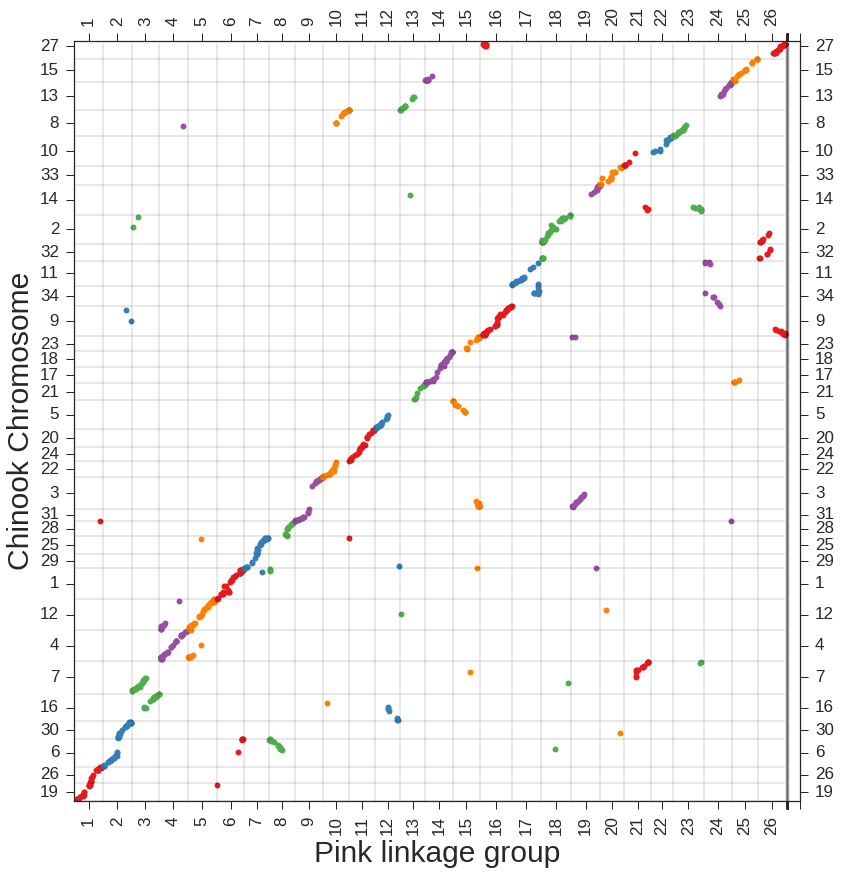

In [50]:
sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary, fit_reg = False, hue = 'pink_LG', legend = False,
           palette=colors, size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,27))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


# save figure as png
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_OXFORD.png')
plt.show()

In [51]:
duplicate_colors = colors = sns.xkcd_palette(['blue','orange red' ])

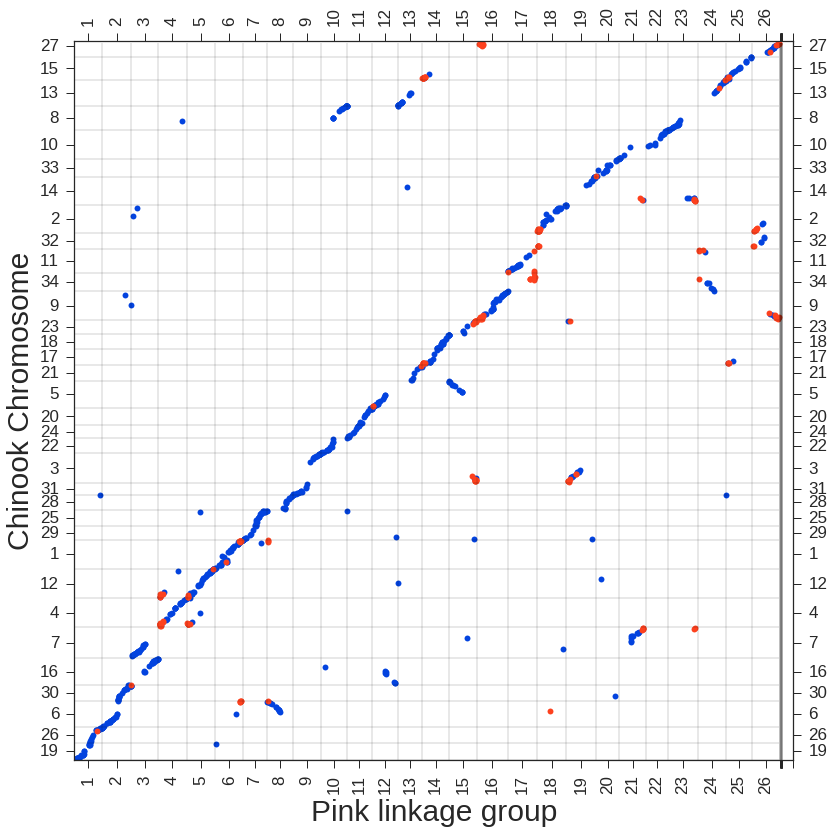

In [52]:
err = sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary, fit_reg = False, hue = 'Paralog', legend = False,
           palette=duplicate_colors, size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,27))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# adjust spacing at top
#err.fig.subplots_adjust(top=.6, left=.1, bottom =0)
err.fig.tight_layout()
# save figure as png
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_duplicates_OXFORD.png')
plt.show()

###Without Paralogs

In [53]:
sns.lmplot('pink_pos', 'CLEAN_Ots_pos', data = synteny_summary[synteny_summary['Paralog']=='1'], fit_reg = False, hue = 'Paralog', legend = False,
           palette=sns.xkcd_palette(['blue']), size = 12, scatter_kws = {'alpha':1, 's':35})
# plot limits
plt.xlim(0, synteny_summary['pink_pos'].max()+10)
plt.ylim(0, synteny_summary['Ots_pos'].max()+10)

# lines delimiting linkage groups
plt.vlines(xx_breaks, ymin = 0, ymax = synteny_summary['Ots_pos'].max(), alpha = .1)
plt.hlines(yy_breaks, xmin = 0, xmax = synteny_summary['pink_pos'].max(), alpha = .1)

# labels for x,y ticks and axes
plt.xticks(xx_lab_loc, range(1,27))

#labels for chinook LGs  
y_tick_labels = [yy[0] for yy in sorted(start_pos_of_Ots_LG.items(), key =lambda foo: foo[1])]
y_tick_labels = [yy if yy != 17 else '*17*' for yy in y_tick_labels]

plt.yticks(yy_lab_loc, y_tick_labels)
plt.xlabel('Pink linkage group', fontsize=30)
plt.ylabel('Chinook Chromosome', fontsize=30)

# add tick to top and side
plt.tick_params(labeltop="on", top = True)
plt.tick_params(labelright="on", right = True)
sns.despine(top=False, right=False, left=False, bottom=False)

#rotate xticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# adjust spacing at top
#err.fig.subplots_adjust(top=.6, left=.1, bottom =0)
err.fig.tight_layout()
# save figure as png
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_OXFORD_NOduplicates.png')
plt.show()


/home/ipseg/anaconda/lib/python2.7/site-packages/pandas/core/ops.py:680: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

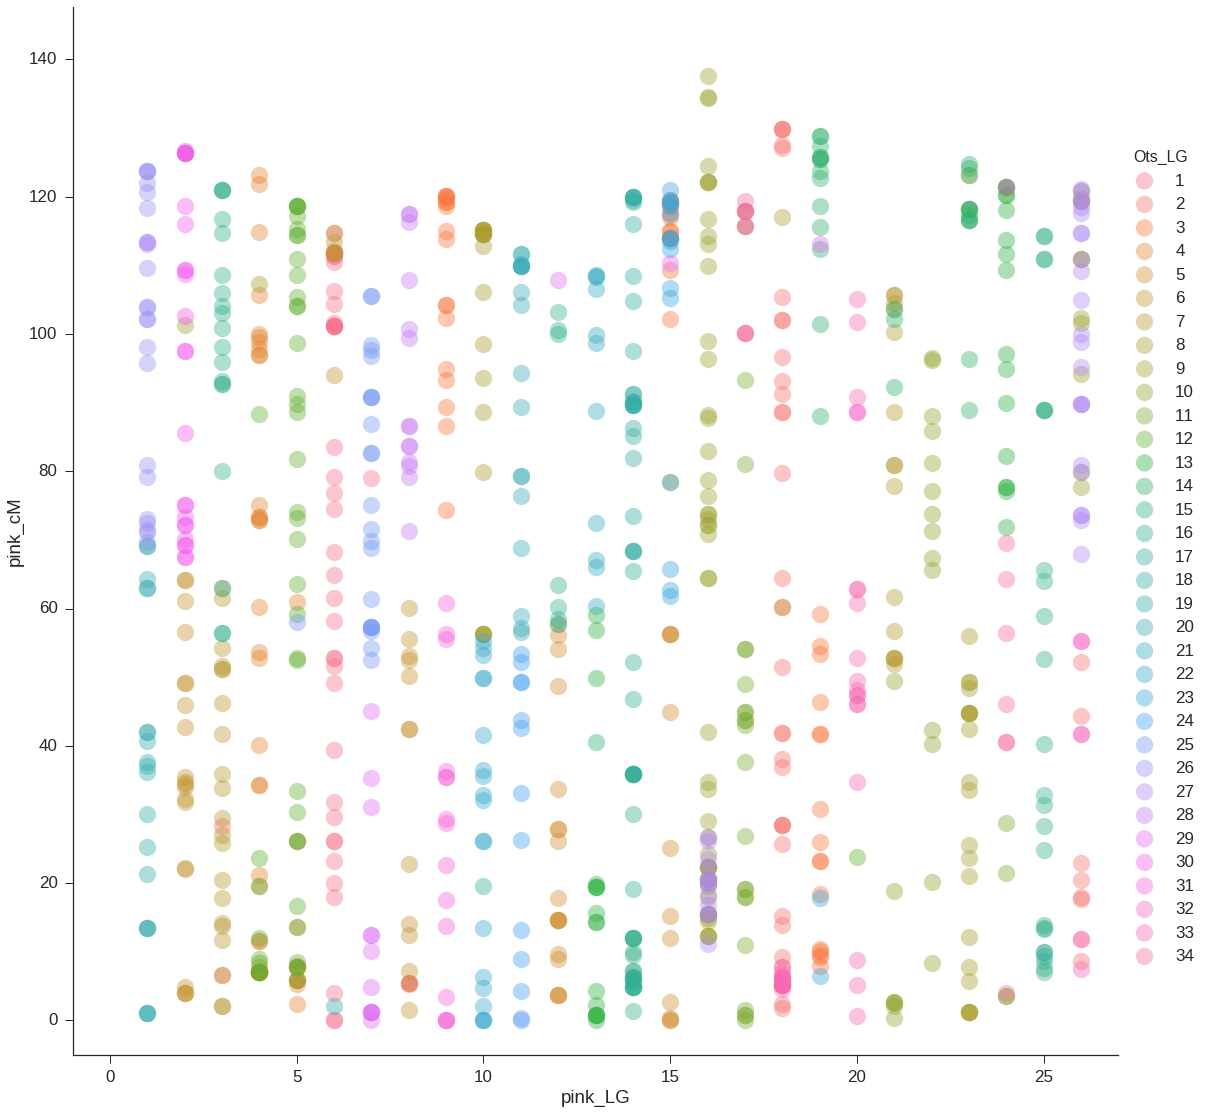

In [54]:
sns.lmplot('pink_LG', 'pink_cM', data = synteny_summary, fit_reg = False, hue = 'Ots_LG', legend = True,
           #palette=sns.color_palette("Set2", 34), 
           palette = sns.color_palette("husl",34 ),
           #palette=sns.color_palette("Set2", 34), 
           size = 16, scatter_kws = {'alpha':.4, 's':300})

plt.ylim(-5, synteny_summary['pink_cM'].max()+10)
plt.xlim(-1, synteny_summary['pink_LG'].max()+1)
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_LGs.png')


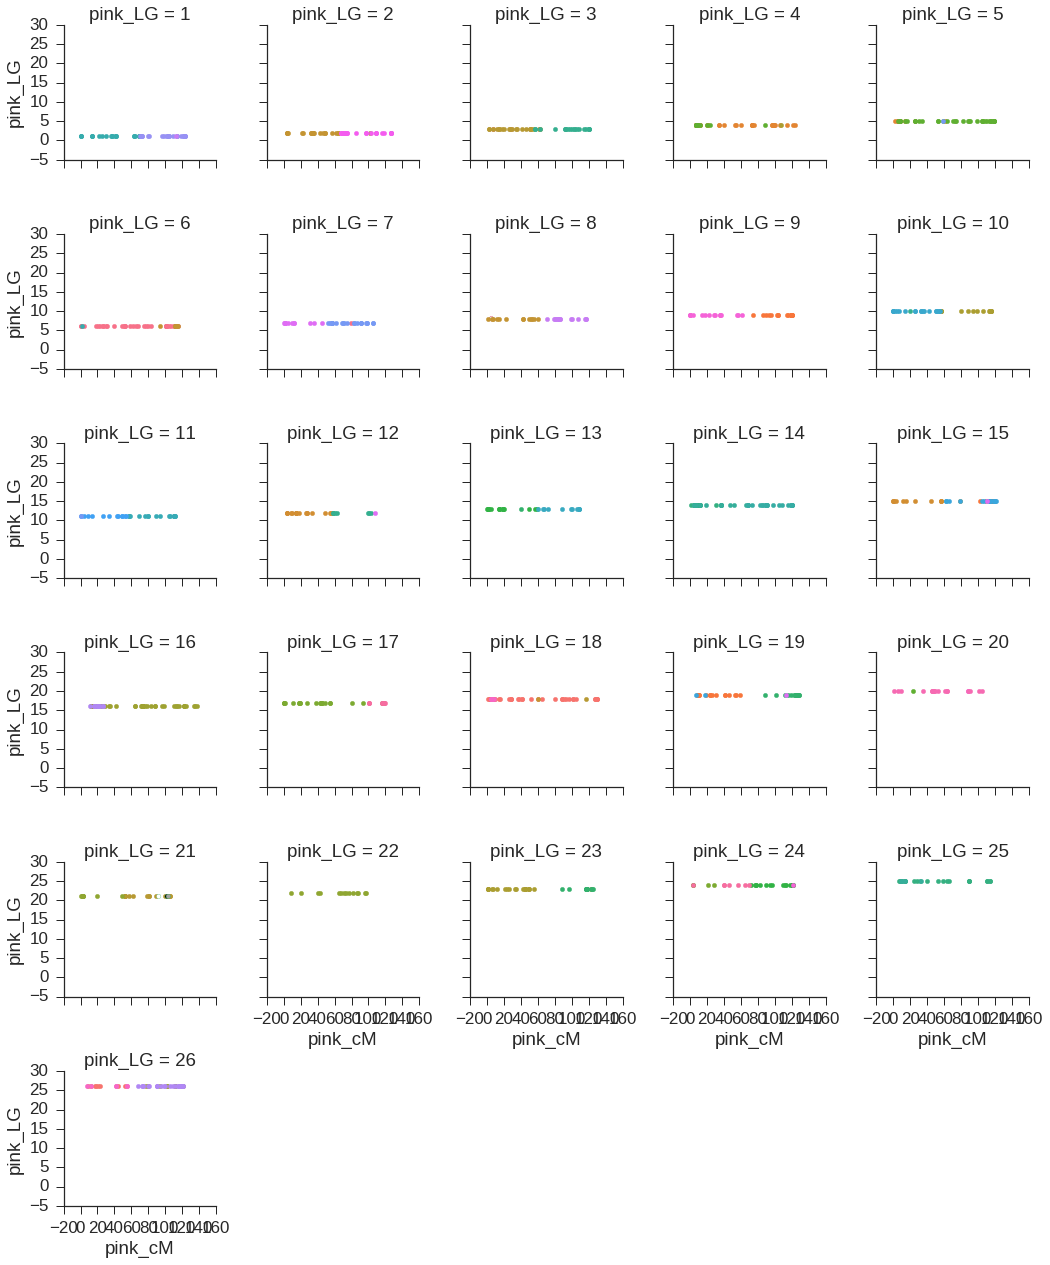

In [55]:
g = sns.FacetGrid(synteny_summary, col="pink_LG", hue = 'Ots_LG', col_wrap=5)
g = g.map(plt.scatter, 'pink_cM', 'pink_LG')
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_LGsGrid.png')


In [56]:
LG_vs_CHR = pd.crosstab(synteny['NewLG'], columns = synteny['Chromosome'])
LG_vs_CHR.index.name = 'Pink LG'

In [57]:
LG_vs_CHR

Chromosome,Ots01,Ots02,Ots03,Ots04,Ots05,Ots06,Ots07,Ots08,Ots09,Ots10,...,Ots25,Ots26,Ots27,Ots28,Ots29,Ots30,Ots31,Ots32,Ots33,Ots34
Pink LG,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,22,0,1,0,0,0,0,0,0
2,0,0,0,0,0,20,0,0,2,0,...,0,0,0,0,0,24,0,0,0,0
3,0,2,0,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,40,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,23,0,0,0,12,0,0,0,0,0
8,3,0,0,0,0,13,0,0,0,0,...,0,0,0,14,0,0,0,0,0,0
9,0,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0


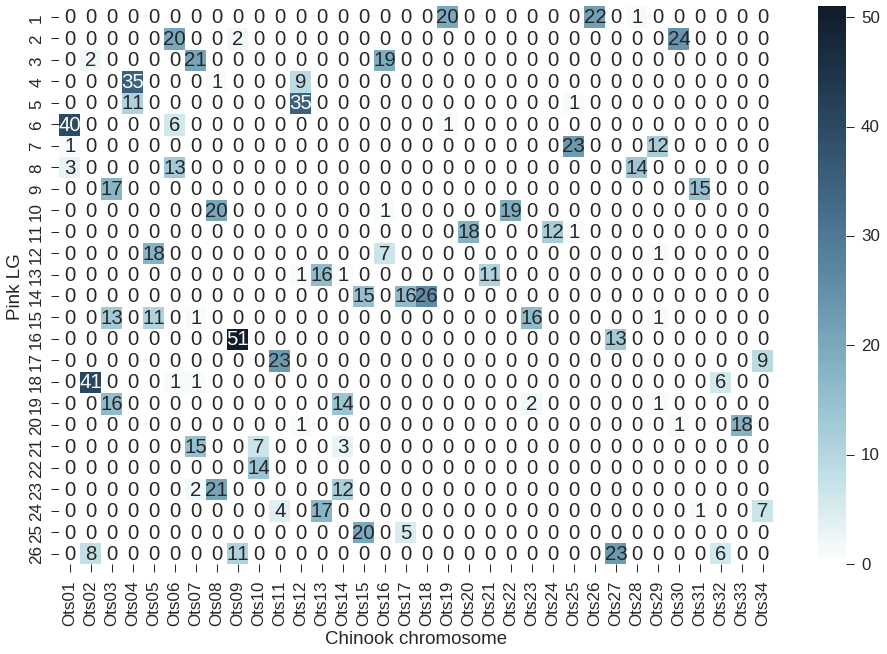

In [58]:
figsize(16,10)
my_colors = sns.cubehelix_palette(n_colors = 6, light=1, start = 2.8, rot = -.1, gamma = 1.2, as_cmap=True)
sns.heatmap(LG_vs_CHR, annot = True, linewidths = 0,square = False, cmap=my_colors, 
           cbar_kws={"orientation": "vertical"})
plt.xlabel('Chinook chromosome')
plt.savefig('/home/ipseg/Desktop/pink_to_chinook/NewLGalignment/pink_to_chinook_table.png')

plt.show()